In [26]:
import numpy as np
import io
import sys
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
import math
from scipy import stats


%matplotlib inline

In [27]:
n_path = 'Examples/australia/results_6/realtime_data/'
o_path = 'Examples/australia/results_6/realtime_data/'

In [32]:
old_elev = pickle.load(open("%s/0/pred_elev_vec.pkl"%(o_path), "rb" ) )
old_erdp = pickle.load(open("%s/0/pred_erodep_vec.pkl"%(o_path), "rb" ) )
old_elev_pts = pickle.load(open("%s/0/pred_elev_pts_vec.pkl"%(o_path), "rb" ) )
old_erdp_pts = pickle.load(open("%s/0/pred_erodep_pts_vec.pkl"%(o_path), "rb" ) )

new_elev = pickle.load(open("%s/1/pred_elev_vec.pkl"%(n_path), "rb" ) )
new_erdp = pickle.load(open("%s/1/pred_erodep_vec.pkl"%(n_path), "rb" ) )
new_elev_pts = pickle.load(open("%s/1/pred_elev_pts_vec.pkl"%(n_path), "rb" ) )
new_erdp_pts = pickle.load(open("%s/1/pred_erodep_pts_vec.pkl"%(n_path), "rb" ) )

In [36]:
# print(new_elev.keys())
print(new_elev[0.0])
elev = new_elev[0.0]
    
elev_selected = np.where((elev >= 0) & (elev <=10))

print(elev_selected, ' elev_seclected')

# print(new_elev[0.0].shape)

# print(new_erdp.keys())
# print(new_erdp[0.0])
# print(new_erdp[0.0].shape)

[[-4795.81758233 -4797.04796707 -4885.02124399 ... -4005.54822466
  -3986.62065519 -3986.35892751]
 [-4795.6489969  -4797.29411183 -4885.15945913 ... -4005.52159095
  -3987.11128747 -3986.70653106]
 [-4784.40018371 -4784.25420682 -4852.86785871 ... -4024.2886447
  -4009.68267364 -4009.71391014]
 ...
 [-5111.07835221 -5111.00040555 -5105.19275267 ... -3951.66098898
  -3916.66329716 -3916.7431924 ]
 [-5105.60528127 -5105.41426513 -5099.3640945  ... -3951.16023441
  -3914.46436939 -3913.79926037]
 [-5105.52390423 -5105.43993247 -5099.48169864 ... -3951.12246116
  -3914.26796548 -3913.75708485]]
((array([ 18,  20,  20,  21,  21,  21,  22,  22,  22,  24,  25,  27,  28,
        30,  30,  31,  34,  36,  36,  36,  37,  37,  38,  39,  40,  41,
        42,  42,  42,  43,  44,  44,  44,  44,  47,  51,  52,  55,  56,
        58,  62,  63,  63,  65,  66,  67,  67,  68,  68,  69,  69,  70,
        70,  70,  71,  72,  73,  74,  75,  75,  76,  76,  77,  77,  77,
        79,  80,  80,  82,  82,  82,  8

In [11]:
# plt.figure(figsize=(10,5))
# sns.heatmap(old_erdp[0.0])

# plt.figure(figsize=(10,5))
# sns.heatmap(new_erdp[0.0])

# residual = old_erdp[0.0] - new_erdp[0.0]

# plt.figure(figsize=(10,5))
# sns.heatmap(residual)

# basin = old_erdp[0.0]
# basin = basin[68:104,0:50]
# plt.figure(figsize=(10,5))
# sns.heatmap(basin)

In [12]:

# plt.figure(figsize=(10,5))
# sns.heatmap(old_elev[0.0])


# plt.figure(figsize=(10,5))
# sns.heatmap(new_elev[0.0])

# residual_elev = old_elev[0.0] - new_elev[0.0]
# plt.figure(figsize=(10,5))
# sns.heatmap(residual_elev)

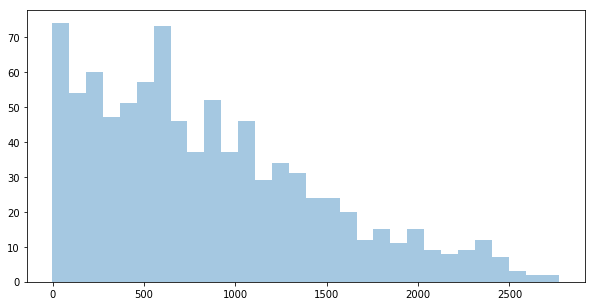

In [13]:
erdp_pts = np.loadtxt('Examples/australia/data/final_erdp_pts_.txt')
plt.figure(figsize=(10,5))
sns.distplot(erdp_pts, bins = 30,kde = False)

In [14]:
# plt.figure(figsize=(10,5))
# sns.distplot(old_erdp_pts[0.0],bins = 30, kde = False)

In [15]:
# plt.figure(figsize=(10,5))
# sns.distplot(new_erdp_pts[0.0], bins = 30, kde = False)

In [16]:
print(erdp_pts.shape, old_erdp_pts[0.0].shape, new_erdp_pts[0.0].shape)

((901,), (901,), (901,))


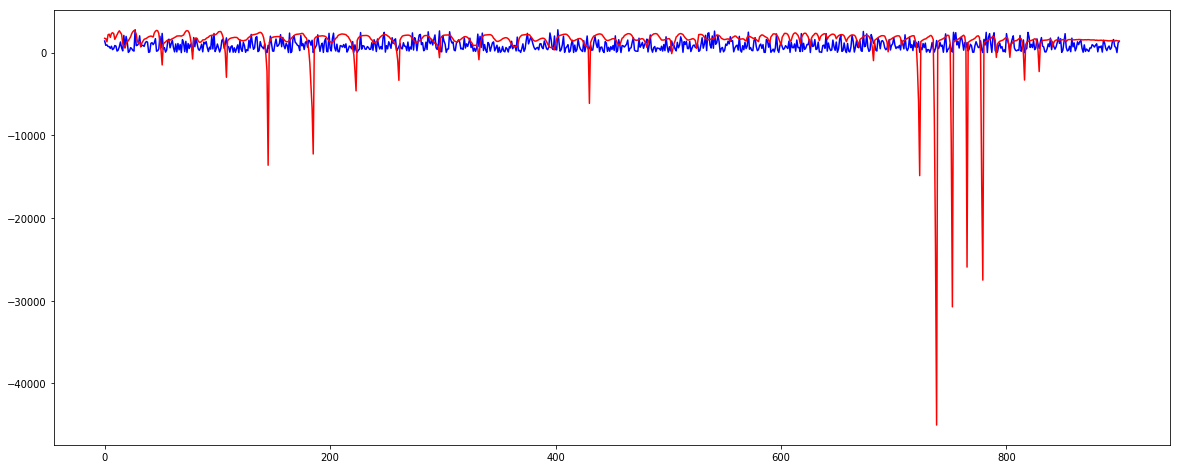

In [17]:
rcParams['figure.figsize'] = 20,8
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(erdp_pts, color = 'b')
ax1.plot(old_erdp_pts[0.0], color = 'r')
# ax1.plot(new_erdp_pts[0.0], color = 'g')
plt.show()

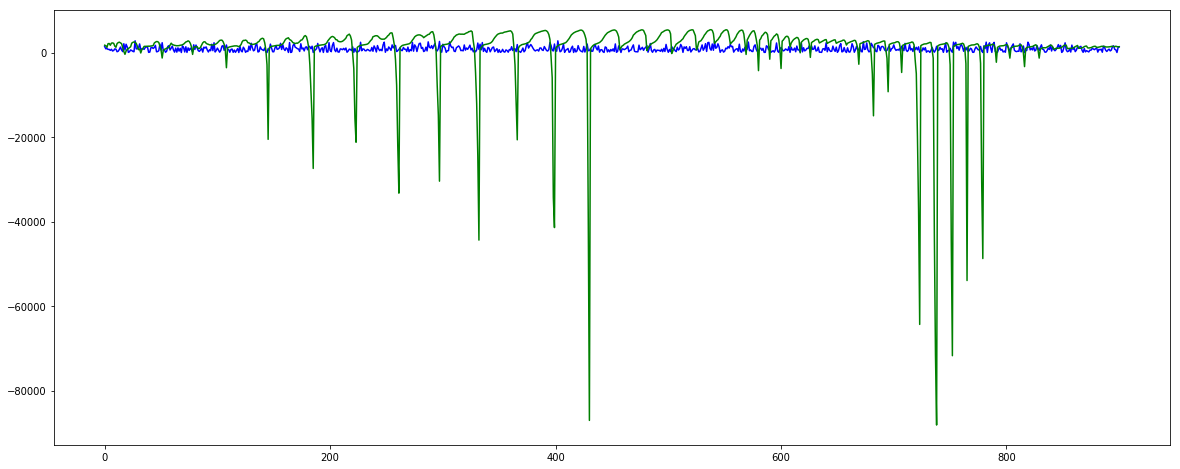

In [18]:
rcParams['figure.figsize'] = 20,8
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(erdp_pts, color = 'b')
# ax1.plot(old_erdp_pts[0.0], color = 'r')
ax1.plot(new_erdp_pts[0.0], color = 'g')
plt.show()

In [19]:
erdp_pts.shape[0]

901

In [20]:
tau_erodep  =  np.sum(np.square(old_erdp_pts[0.0] - erdp_pts))/ erdp_pts.shape[0]

In [21]:
likelihood_erodep  = np.sum(-0.5 * np.log(2 * math.pi * tau_erodep ) - 0.5 * np.square(old_erdp_pts[0.0] - erdp_pts) / tau_erodep )

In [22]:
print(tau_erodep, likelihood_erodep)
rmse = np.sqrt(tau_erodep)
print('rmse = ', rmse)

(8535441.023550028, -8468.325400563848)
('rmse = ', 2921.547710298435)


In [23]:
array = old_erdp_pts[0.0]
# array[array < 0] = 0
array[array < 0] = np.mean(erdp_pts)
# array[array < 0] = np.mode(erdp_pts)


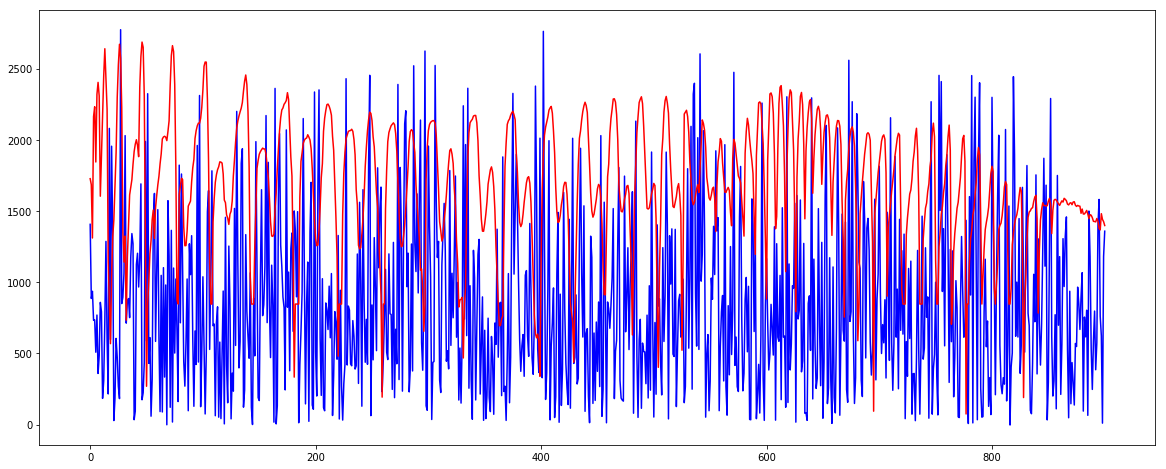

In [24]:
rcParams['figure.figsize'] = 20,8
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(erdp_pts, color = 'b')
ax1.plot(array, color = 'r')
# ax1.plot(new_erdp_pts[0.0], color = 'g')
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(array,bins = 30,kde = False)


In [2]:
tau_erodep  =  np.sum(np.square(array - erdp_pts))/ erdp_pts.shape[0]
likelihood_erodep  = np.sum(-0.5 * np.log(2 * math.pi * tau_erodep ) - 0.5 * np.square(array - erdp_pts) / tau_erodep )
print(tau_erodep, likelihood_erodep)
rmse = np.sqrt(tau_erodep)
print('rmse = ', rmse)

NameError: name 'np' is not defined

In [3]:

array = new_erdp_pts[0.0]
# array[array < 0] = 0
array[array < 0] = np.mean(erdp_pts)

rcParams['figure.figsize'] = 20,8
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(erdp_pts, color = 'b')
ax1.plot(array, color = 'r')
# ax1.plot(new_erdp_pts[0.0], color = 'g')
plt.show()

NameError: name 'new_erdp_pts' is not defined

In [4]:
plt.figure(figsize=(10,5))
sns.distplot(array, bins = 30, kde = False)

NameError: name 'plt' is not defined

In [5]:
tau_erodep  =  np.sum(np.square(array - erdp_pts))/ erdp_pts.shape[0]
likelihood_erodep  = np.sum(-0.5 * np.log(2 * math.pi * tau_erodep ) - 0.5 * np.square(array - erdp_pts) / tau_erodep )
print(tau_erodep, likelihood_erodep)
rmse = np.sqrt(tau_erodep)
print('rmse = ', rmse)

NameError: name 'np' is not defined

In [6]:
print(np.mean(erdp_pts))

NameError: name 'np' is not defined